In [3]:
from hulearn.datasets import load_titanic

In [4]:
df = load_titanic(as_frame=True)
df.head()

,survived,pclass,name,sex,age,fare,sibsp,parch
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,0,0


In [5]:
X, y = df.drop(columns=['survived']), df['survived']

In [6]:
import numpy as np
from hulearn.classification import FunctionClassifier

def fare_based(dataf, threshold=10):
    """
    The assumption is that folks who paid more are wealthier and are more
    likely to have recieved access to lifeboats.
    """
    return np.array(dataf['fare'] > threshold).astype(int)

mod = FunctionClassifier(fare_based)

In [7]:
mod.fit(X, y).predict(X)

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, make_scorer

# Note the threshold keyword argument in this function.
def fare_based(dataf, threshold=10):
    return np.array(dataf['fare'] > threshold).astype(int)

# Pay attention here, we set the threshold argument in here.
mod = FunctionClassifier(fare_based, threshold=10)

# The GridSearch object can now "grid-search" over this argument.
# We also add a bunch of metrics to our approach so we can measure.
grid = GridSearchCV(mod,
                    cv=2,
                    param_grid={'threshold': np.linspace(0, 100, 30)},
                    scoring={'accuracy': make_scorer(accuracy_score),
                             'precision': make_scorer(precision_score),
                             'recall': make_scorer(recall_score)},
                    refit='accuracy')
grid.fit(X, y)

GridSearchCV(cv=2,
             estimator=FunctionClassifier(func=<function fare_based at 0x12c810c20>,
                                          threshold=10),
             param_grid={'threshold': array([  0.        ,   3.44827586,   6.89655172,  10.34482759,
        13.79310345,  17.24137931,  20.68965517,  24.13793103,
        27.5862069 ,  31.03448276,  34.48275862,  37.93103448,
        41.37931034,  44.82758621,  48.27586207,  51.72413793,
        55.17241379,  58.62068966,  62.06896552,  65.51724138,
        68.96551724,  72.4137931 ,  75.86206897,  79.31034483,
        82.75862069,  86.20689655,  89.65517241,  93.10344828,
        96.55172414, 100.        ])},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})

In [9]:
grid.cv_results_

{'mean_fit_time': array([0.00192654, 0.00158298, 0.00159597, 0.00186443, 0.00160289,
        0.00156426, 0.001454  , 0.00150847, 0.00140989, 0.00148821,
        0.00161016, 0.001513  , 0.00145507, 0.00147617, 0.00147653,
        0.00140548, 0.00150704, 0.00138354, 0.00148439, 0.00141537,
        0.00157309, 0.0014652 , 0.00149345, 0.00144553, 0.00143659,
        0.00149167, 0.00139797, 0.0015136 , 0.001387  , 0.0014888 ]),
 'std_fit_time': array([4.47034836e-05, 5.49554825e-05, 4.29153442e-05, 6.43730164e-06,
        6.89029694e-05, 7.86781311e-06, 2.01463699e-05, 6.74724579e-05,
        2.49147415e-05, 1.09195709e-04, 2.22086906e-04, 1.35898590e-04,
        4.98294830e-05, 7.03334808e-06, 9.03606415e-05, 2.14576721e-05,
        4.19616699e-05, 1.66893005e-06, 6.55651093e-05, 3.03983688e-05,
        7.10487366e-05, 4.70876694e-05, 1.04427338e-04, 5.43594360e-05,
        5.13792038e-05, 8.16583633e-05, 1.10864639e-05, 7.95125961e-05,
        1.78813934e-06, 1.15633011e-05]),
 'mean_scor

In [12]:
import matplotlib.pyplot as plt
plt.plot(grid.cv_results_[mean_test_accuracy])

NameError: name 'mean_test_accuracy' is not defined

In [14]:
grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_threshold', 'params', 'split0_test_accuracy', 'split1_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy', 'split0_test_precision', 'split1_test_precision', 'mean_test_precision', 'std_test_precision', 'rank_test_precision', 'split0_test_recall', 'split1_test_recall', 'mean_test_recall', 'std_test_recall', 'rank_test_recall'])

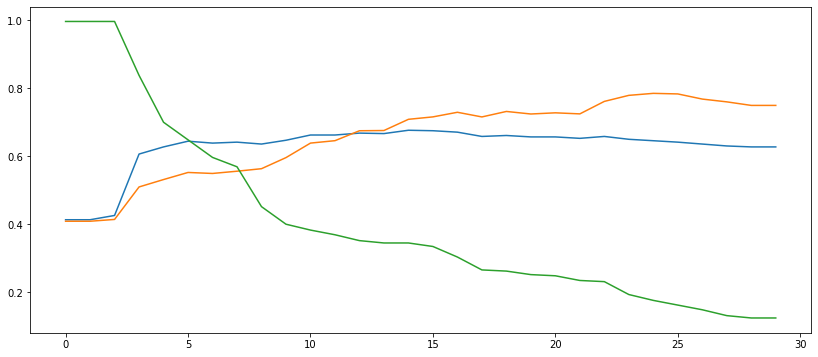

In [22]:
plt.figure(figsize=(14, 6))
plt.plot(grid.cv_results_['mean_test_accuracy'])
plt.plot(grid.cv_results_['mean_test_precision'])
plt.plot(grid.cv_results_['mean_test_recall'])
plt.show()

In [23]:
def last_name(dataf, sex='male', pclass=1):
    predicate = (dataf['sex'] == sex) & (dataf['pclass'] == pclass)
    return np.array(predicate).astype(int)

# Once again, remember to declare your arguments here too!
mod = FunctionClassifier(last_name, pclass=10, sex='male')

# The arguments of the function can now be "grid-searched".
grid = GridSearchCV(mod,
                    cv=2,
                    param_grid={'pclass': [1, 2, 3], 'sex': ['male', 'female']},
                    scoring={'accuracy': make_scorer(accuracy_score),
                             'precision': make_scorer(precision_score),
                             'recall': make_scorer(recall_score)},
                    refit='accuracy')
grid.fit(X, y)

GridSearchCV(cv=2,
             estimator=FunctionClassifier(func=<function last_name at 0x12e36ba70>,
                                          pclass=10, sex='male'),
             param_grid={'pclass': [1, 2, 3], 'sex': ['male', 'female']},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})